In [1]:
import time
import geopy
import numpy                as np
import pandas               as pd
import seaborn              as sns
import plotly.express       as px
import matplotlib.pyplot    as plt
import ipywidgets           as widgets
import geopandas            as gpd
import matplotlib.pyplot    as plt
import plotly_express       as px

from geopy.geocoders          import Nominatim
from tabulate                 import tabulate
from datetime                 import datetime as dt
from matplotlib               import gridspec
from IPython.core.display     import HTML  
from ipywidgets               import fixed
from multiprocessing          import Pool
from geopy.extra.rate_limiter import RateLimiter

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline

    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [20,12]
    plt.rcParams['font.size'] = 15
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.set_option('display.float_format', lambda x: '%.3f' % x)
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )

    sns.set()


In [3]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


# 0.0 Imports

## 0.1 Loanding Data

In [4]:
df_kc_sales = pd.read_csv("kc_house_data.csv", index_col = False, low_memory = False)

In [5]:
df_kc_sales.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12393,4136920030,20140524T000000,347000.000,4,1.500,2670,10026,2.000,0,0,3,8,2670,0,1996,0,98092,47.266,-122.215,2420,11900
6968,7885100005,20140820T000000,299000.000,4,2.000,2320,12000,1.000,0,0,3,7,1720,600,1943,2014,98108,47.525,-122.325,1390,6000
4146,461002551,20141004T000000,330600.000,1,1.000,580,1799,1.000,0,0,3,7,580,0,1908,2005,98117,47.683,-122.375,1260,4000
15149,9406510130,20150505T000000,448000.000,5,3.500,3740,24684,2.000,0,0,3,9,2760,980,1998,0,98038,47.383,-122.057,2880,26023
14881,1311600020,20140821T000000,285000.000,4,2.500,2360,7350,1.000,0,0,4,7,1440,920,1965,0,98001,47.342,-122.277,1450,7305


# 1.0 Data Descriptive



In [6]:
df1 = df_kc_sales.copy()

# 1.1 Data Dimensions

In [7]:
print ('Number of Rows: {}'.format( df1.shape[0]))
print ('Number of Cols: {}'.format (df1.shape[1]))

Number of Rows: 21613
Number of Cols: 21


In [8]:
df1.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# 1.2 Data Types

In [9]:
df1.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

# 1.3 API (Adicionar Endereço Completo)

In [10]:
#df1['query'] = df1[['lat', 'long']].apply( lambda x: str(x['lat']) + ',' + str(x['long']), axis = 1)
#
#df_query = df1.loc[:,('id', 'query')]

In [11]:
#Create Empty Columns

#df1.loc[:,'place_id']      = 'NA'
#df1.loc[:,'osm_type']      = 'NA'
#df1.loc[:,'house_number']  = 'NA'
#df1.loc[:,'road']          = 'NA'
#df1.loc[:,'neighbourhood'] = 'NA'
#df1.loc[:,'city']          = 'NA'
#df1.loc[:,'county']        = 'NA'
#df1.loc[:,'state']         = 'NA'
#df1.loc[:,'country']       = 'NA'
#df1.loc[:,'country_code']  = 'NA'

In [12]:
#p = Pool(4)
#
#
#start = time.process_time()
#
##Arquivo 'defs' em .py
#
#import defs
#
#df_query[['house_number','road', 'neighbourhood', 'city', 'state', 'country']] = p.map ( defs.get_data, df_query.iterrows())
#
#end = time.process_time()
#
#print ('Time Elapsed: {}', end - start)

#df_query = df_query.to_csv("df_query.csv")

In [13]:
df_query = pd.read_csv('df_query.csv')

In [14]:
df_query.head()

,Unnamed: 0,id,query,house_number,road,neighbourhood,city,state,country
0,0,7129300520,"47.5112,-122.257",10012,61st Avenue South,Rainier Beach,Seattle,Washington,United States
1,1,6414100192,"47.721,-122.319",837,Northeast 127th Street,NaN,Seattle,Washington,United States
2,2,5631500400,"47.7379,-122.233",15109,81st Avenue Northeast,NaN,NaN,Washington,United States
3,3,2487200875,"47.5208,-122.393",9236,Fauntleroy Way Southwest,NaN,Seattle,Washington,United States
4,4,1954400510,"47.6168,-122.045",923,221st Avenue Northeast,NaN,NaN,Washington,United States


# 1.4 Check NA

In [15]:
df1.isnull().sum()#/df1.shape[0] * 100

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# 1.4 Descriptive Statistical

In [16]:
num_att = df1.select_dtypes( include = ['int64', 'float64'])

# 1.4.1 Numerical Attributes

In [17]:
# Central Tendency - Mean, Median

ct1 = pd.DataFrame (num_att.apply (np.mean)).T
ct2 = pd.DataFrame (num_att.apply (np.median)).T

#Dispersion - std, min, max, range, skew, kurtosis

d1 = pd.DataFrame (num_att.apply (np.std)).T
d2 = pd.DataFrame (num_att.apply (min)).T
d3 = pd.DataFrame (num_att.apply (max)).T
d4 = pd.DataFrame (num_att.apply (lambda x: x.max() - x.min())).T
d5 = pd.DataFrame (num_att.apply (lambda x: x.skew())).T
d6 = pd.DataFrame (num_att.apply (lambda x: x.kurtosis())).T

# Concatenate

t = pd.concat ((d2, d3, d4, ct1, ct2, d1, d5, d6)).T.reset_index()
t.columns =['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

t

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1000102.000,9900000190.000,9899000088.000,4580301520.865,3904930410.000,2876499023.428,0.243,-1.261
1,price,75000.000,7700000.000,7625000.000,540088.142,450000.000,367118.703,4.024,34.586
2,bedrooms,0.000,33.000,33.000,3.371,3.000,0.930,1.974,49.064
3,bathrooms,0.000,8.000,8.000,2.115,2.250,0.770,0.511,1.280
4,sqft_living,290.000,13540.000,13250.000,2079.900,1910.000,918.420,1.472,5.243
5,sqft_lot,520.000,1651359.000,1650839.000,15106.968,7618.000,41419.553,13.060,285.078
6,floors,1.000,3.500,2.500,1.494,1.500,0.540,0.616,-0.485
7,waterfront,0.000,1.000,1.000,0.008,0.000,0.087,11.385,127.632
8,view,0.000,4.000,4.000,0.234,0.000,0.766,3.396,10.893
9,condition,1.000,5.000,4.000,3.409,3.000,0.651,1.033,0.526


# 1.5 Modificações Para Alterações de Variáveis (Usabilidade)

In [18]:
##Considerações de Old_House e New_House
#Imóvel com data a partir de 01-01-2015: 'new_house'
#Imóvel com data anterior à 01-01-2015: 'old_house'

df1['date'] = pd.to_datetime(df1['date'], format = '%Y-%m-%d')
df1['house_age'] = df1['date'].apply( lambda x: 'new_house' if x > pd.to_datetime('2015-01-01',format = '%Y-%m-%d')  else 'old_house')

In [19]:
##Considerações sobre tipo de Quarto
#Imóvel com um quarto: 'Studio'
#Imóvel com dois quartos: 'Apartament'
#Imóvel com mais de dois quartos: 'House'
#Imóvel com valor '0': 'No Bedroom'

df1['dormitory_type'] = df1['bedrooms'].apply(lambda x: 'studio' if x == 1 else
                                                        'apartament' if x == 2 else
                                                        'house' if x > 2 else "no bedroom" )

In [20]:
##Considerações sobre Conservação do Apartamento
#Imóvel com condição 1: 'bad'
#Imóvel com condição 2: 'bad'
#Imóvel com condição 3: 'regular'
#Imóvel com condição 4: 'regular'
#Imóvel com condição 5: 'good'


df1['condition_type'] = df1['condition'].apply(lambda x: 'bad' if x <= 2 else
                                                         'regular' if (x == 3) | (x == 4) else 'good')
df1['condition'] = df1['condition'].astype('str')

In [21]:
#Modificação de Colunas

df1 = df1.drop(['sqft_living15', 'sqft_lot15'], axis = 1)

In [22]:
#Transformação para Datas

df1['yr_built'] = pd.to_datetime(df1['yr_built'], format = '%Y').dt.year

df1['yr_renovated'] = df1['yr_renovated'].apply (lambda x: pd.to_datetime ('1900-01-01', format = '%Y-%m-%d') if x == 0 else pd.to_datetime (x, format ='%Y'))

In [23]:
##Considerações sobre Level de Valores
#Imóvel 0 até 321.950: 0
#Imóvel 321.950 até 450.000: 1
#Imóvel 450.000 até 645.000: 2
#Imóvel acima de 645.000: 3

df1['level'] = 'standard'
       
df1['level'] = df1['price'].apply ( lambda x: 0 if x < 321950 else
                                              1 if (x > 321950) & (x < 450000) else
                                              2 if (x > 450000) & (x < 645000) else 3)

df1['level'] = df1['level'].astype(int)

In [24]:
# Coluna "Yes/No" WaterFront

df1['is_waterfront'] =  df1['waterfront'].apply( lambda x: 'Yes' if x == 1 else 'No')

In [25]:
## Size das Salas de Estar
#Imóvel 0 até 1.427: 0
#Imóvel 1.427 até 1.910: 1
#Imóvel 1.910 até 2.550: 2
#Imóvel acima de 2.550: 3

df1['size'] = 'standard'

df1['size'] = df1['sqft_living'].apply ( lambda x: 's00' if (x >= 0) & (x <= 1427) else
                                            's01' if (x > 1427) & (x <= 1910) else
                                            's02' if (x > 1910) & (x <= 2550) else 's03')

In [26]:
##Inconformidade de Valores

print(df1['bedrooms'].unique())
print(df1['floors'].value_counts())

[ 3  2  4  5  1  6  7  0  8  9 11 10 33]
1.000    10680
2.000     8241
1.500     1910
3.000      613
2.500      161
3.500        8
Name: floors, dtype: int64


In [27]:
df1 = df1.drop(df1[df1['bedrooms'] > 11].index)

In [28]:
df1['floors'] = df1['floors'].apply(np.ceil)

In [29]:
df1['bathrooms'] = df1['bathrooms'].apply(np.ceil)

In [30]:
df_clean = df1.to_csv('df_clean')

In [31]:
df_clean = pd.read_csv('df_clean')

# 3.0 Perguntas CEO

## 1. Quantas casas estão disponíveis para compra?

In [32]:
houses = len( df1['id'].unique())
print ('O número de casas disponíveis é de {}.'.format (houses))

O número de casas disponíveis é de 21435.


## 2. Quantos atributos as casas possuem?

In [33]:
attribut = df1.drop(['id', 'date'], axis = 1)
a = len(attribut.columns)

print ('O número de atributos é: {}.'.format (a))

O número de atributos é: 23.


## 3. Quais são os atributos das casas?

In [34]:
a = attribut.columns
a

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'house_age', 'dormitory_type', 'condition_type', 'level',
       'is_waterfront', 'size'],
      dtype='object')

## 4. Qual a casa mais cara?

In [35]:
a = df1[['id', 'price']].sort_values ( 'price', ascending = False).reset_index(drop = True)['id'][0]
b = df1[['id', 'price']].sort_values ( 'price', ascending = False).reset_index(drop = True)['price'][0]

print ('A casa mais cara é a de ID: {} e valor: {}.'.format (a,b))

A casa mais cara é a de ID: 6762700020 e valor: 7700000.0.


## 5. Qual a casa com o maior número de quartos?

In [36]:
a = df1[['id', 'bedrooms']].sort_values ( 'bedrooms', ascending = False).reset_index(drop = True)['id'][0]
b = df1[['id', 'bedrooms']].sort_values ( 'bedrooms', ascending = False).reset_index(drop = True)['bedrooms'][0]

print ('A casa com o maior número de quartos é a de ID: {} e possui: {} quartos.'.format (a,b))

A casa com o maior número de quartos é a de ID: 1773100755 e possui: 11 quartos.


## 6. Quantas casas possuem 2 banheiros? E qual o valor médio destas?

In [37]:
a = len(df1.loc[df1['bathrooms'] == 2, ['id', 'bathrooms']])
b = np.round(df1.loc[df1['bathrooms'] == 2, 'price'].mean(), 2)

print( 'O número de casas que possuem 2 banheiros é de {} e o valor médio destas estão por volta de {}.'. format(a,b))

O número de casas que possuem 2 banheiros é de 6432 e o valor médio destas estão por volta de 445752.69.


##  7. Qual o preço mínimo entre as casas com 3 quartos?

In [38]:
a = df1.loc[df1['bedrooms'] == 3, 'price'].min()

print( 'O preço mínimo de casas que possuem 3 quartos é de {}.'. format(a))

O preço mínimo de casas que possuem 3 quartos é de 82000.0.


## 8. Quantas casas possuem mais de 300 metros quadrados na sala de estar e têm mais de 2 banheiros?

In [39]:
df1['m2'] = df1['sqft_living'] *0.093

a = len(df1.loc[(df1['m2'] > 300) & (df1['bedrooms'] > 2), 'id'])

print( 'O número de casas que possuem 300 metros quadrados na sala de estar e possuem 2 banheiros é de {}.'. format(a))

O número de casas que possuem 300 metros quadrados na sala de estar e possuem 2 banheiros é de 2249.


## 9. Quantas casas possuem mais de 2 andares? E quantos possuem dois andares?

In [40]:
a = len (df1.loc[df1['floors']>2, 'id'])
b = len (df1.loc[df1['floors'] == 2, 'id'])

print( 'O número de casas que possuem mais de 2 andares é de {} e das que possuem dois andares é de {}.'. format(a,b))

O número de casas que possuem mais de 2 andares é de 782 e das que possuem dois andares é de 10151.


## 10. Quantas casas tem vista para o mar/lago?

In [41]:
a = len (df1.loc[df1['waterfront'] == 1, 'id'])
print( 'O número de casas que possuem vista para o mar/lago é de {}.'. format(a))

O número de casas que possuem vista para o mar/lago é de 163.


## 11. Das casas com vista para o mar/lago, quantas tem 3 quartos?

In [42]:
a = len(df1.loc[(df1['waterfront'] == 1) & (df1['bedrooms'] == 3), 'id'])

print( 'O número de casas que possuem vista para o mar/lago e possuem 3 quartos é de {}.'. format(a))

O número de casas que possuem vista para o mar/lago e possuem 3 quartos é de 64.


## 12. Qual a data do imóvel mais antigo? E qual a data mais antiga de renovação?

In [43]:
a = df1['yr_built'].min()
b = df1.loc[df1['yr_renovated'] > pd.to_datetime('1900-01-01',format = '%Y-%m-%d'), 'yr_renovated'].dt.year.min()

print( 'A data do imóvel mais antigo é de {} e data do imóvel que tem a reforma mais antiga é de {}.'. format(a,b))

A data do imóvel mais antigo é de 1900 e data do imóvel que tem a reforma mais antiga é de 1934.


## 13. Qual o número máximo de andares e quantos casas possuem este número?

In [44]:
a = df1['floors'].unique().max()
b = len(df1[df1['floors'] == 3.5][['floors', 'id']])

print( 'O número máximo de andares é de {} e {} imóveis possuem este número.'. format(a,b))

O número máximo de andares é de 4.0 e 0 imóveis possuem este número.


## 14. Quantos imóveis estão com a condição regular?

In [45]:
a = df1.loc[df1['condition_type'] == 'regular', 'id'].size

print( 'O número imóveis que estão com a condição regular é de {}.'. format(a))

O número imóveis que estão com a condição regular é de 19710.


## 15. Quantos imóveis estão com a condição 'bad' e possuem vista para mar/lago?

In [46]:
a = df1.loc[(df1['condition_type'] == 'bad')& (df1['waterfront'] == 1), 'id'].size

print( 'O número imóveis que estão com a condição "bad" e possuem vista para mar/lago é de {}.'. format(a))

O número imóveis que estão com a condição "bad" e possuem vista para mar/lago é de 2.


## 16. Quantos imóveis estão com a condição 'good' e são consideradas 'new_house'?

In [47]:
a = df1.loc[(df1['condition_type'] == 'good')& (df1['house_age'] == 'new_house'), 'id'].size

print( 'O número imóveis que estão com a condição "good" e são consideradas "new_house" é de {}.'. format(a))

O número imóveis que estão com a condição "good" e são consideradas "new_house" é de 423.


## 17. Qual o valor do imóvel mais caro do tipo 'studio'?

In [48]:
a = df1.loc[df1['dormitory_type'] == 'studio', 'price'].max()

print( 'O valor do imóvel mais caro do tipo "studio" é de {}.'. format(a))

O valor do imóvel mais caro do tipo "studio" é de 1247000.0.


## 18. Quantos imóveis do tipo "apartment" foram reformados em 2015?

In [49]:
a = df1.loc[df1['yr_renovated'] == pd.to_datetime ('2015-01-01'), 'id'].size

print( 'A quantidade de imóveis do tipo "apartment" que foram reformados no ano de 2015 é de {}.'. format(a))

A quantidade de imóveis do tipo "apartment" que foram reformados no ano de 2015 é de 16.


## 19. Qual o maior número de quartos que um imóvel do tipo "house" possui?

In [50]:
a = df1.loc[df1['dormitory_type'] == 'house', 'bedrooms'].max()

print( 'O maior número de quartos de um imóvel do tipo "house" é de {}.'. format(a))

O maior número de quartos de um imóvel do tipo "house" é de 11.


## 20. Quantos imóveis "new_house" foram reformados no ano de 2014?

In [51]:
a = df1.loc[( df1['house_age'] == 'new_house') &
            ( df1['yr_renovated'] == pd.to_datetime ('2014-01-01', format = '%Y-%m-%d')), 'id'].size

print ( 'A quantidade de imóveis considerados "new_house" que foram reformados no ano de 2014 é de {}.'. format(a))

A quantidade de imóveis considerados "new_house" que foram reformados no ano de 2014 é de 15.


# <center> TABELAS

## <center> Imóveis x Quartos

In [52]:
df_grouped = df1[['id', 'bedrooms']].groupby('bedrooms').size()
df_grouped

bedrooms
0       13
1      199
2     2760
3     9824
4     6882
5     1601
6      272
7       38
8       13
9        6
10       3
11       1
dtype: int64

## <center> Imóveis x Ano de Construção
    

In [53]:
df_grouped = df1[['id', 'yr_built']].groupby('yr_built').count().reset_index()
df_grouped

,yr_built,id
0,1900,87
1,1901,29
2,1902,27
3,1903,46
4,1904,45
5,1905,74
6,1906,92
7,1907,65
8,1908,86
9,1909,94


## <center> Menor Número de Quartos x Ano de Construção de Imóveis

In [54]:
df_grouped = df1[['bedrooms', 'yr_built']].groupby('yr_built').min()
df_grouped

,bedrooms
yr_built,
1900,1
1901,2
1902,2
1903,1
1904,2
1905,1
1906,1
1907,1
1908,1


## <center> Preço de Compra Mais Alto x Número de Quarto

In [55]:
df_grouped = df1[['price', 'bedrooms']].groupby('bedrooms').max().reset_index()
df_grouped

,bedrooms,price
0,0,1295650.000
1,1,1247000.000
2,2,3278000.000
3,3,3800000.000
4,4,4489000.000
5,5,7062500.000
6,6,7700000.000
7,7,3200000.000
8,8,3300000.000
9,9,1400000.000


## <center> Tamanho Médio das Salas dos Imóveis x Ano de Construção

In [56]:
df_grouped = df1[['sqft_living', 'yr_built']].groupby('yr_built').mean().reset_index()
df_grouped

,yr_built,sqft_living
0,1900,1732.011
1,1901,1763.621
2,1902,1919.630
3,1903,1507.739
4,1904,1603.178
5,1905,1965.811
6,1906,1802.228
7,1907,1904.277
8,1908,1699.640
9,1909,1900.106


## <center> Média dos Preços dos Imóveis por Tipo de Dormitório x Ano de Construção

In [57]:
df1[['price', 'dormitory_type']].groupby('dormitory_type').mean().reset_index()

,dormitory_type,price
0,apartament,401372.682
1,house,563088.086
2,no bedroom,409503.846
3,studio,317642.884


## <center> Média dos Preços dos Imóveis x Level

In [58]:
df1[['price', 'level']].groupby('level').mean().reset_index()

,level,price
0,0,251544.622
1,1,383596.861
2,2,538922.894
3,3,968416.680


## <center> Média dos Preços dos Imóveis x Tamanho da Sala de Estar

In [59]:
df1[['price', 'size']].groupby('size').mean().reset_index()

,size,price
0,s00,339014.843
1,s01,421764.778
2,s02,521473.766
3,s03,881265.923


# <center> GRÁFICOS

## 1. Gráfico que represente a soma dos preços pelo números de quartos

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

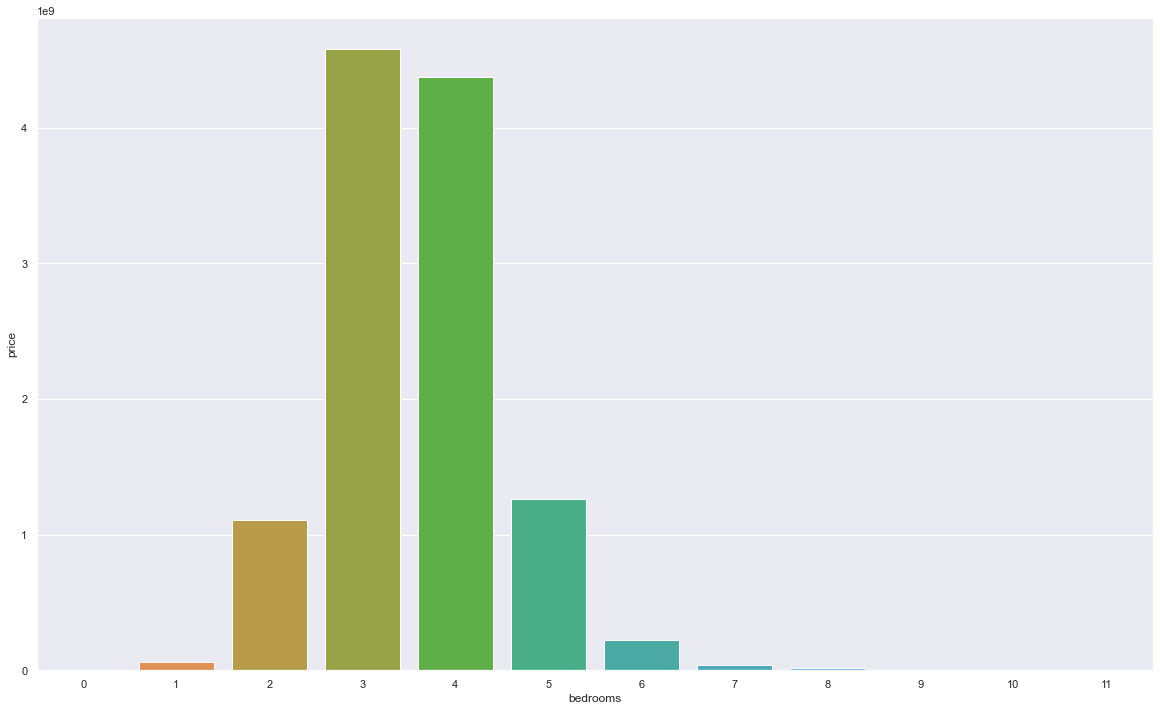

In [60]:
aux1 = df1[['price', 'bedrooms']].groupby('bedrooms').sum().reset_index()

sns.barplot( x = 'bedrooms', y= 'price', data = aux1)

## 2. Gráfico de linhas que represente a média dos preços pelo ano de construção dos imóveis.

<AxesSubplot:xlabel='yr_built', ylabel='price'>

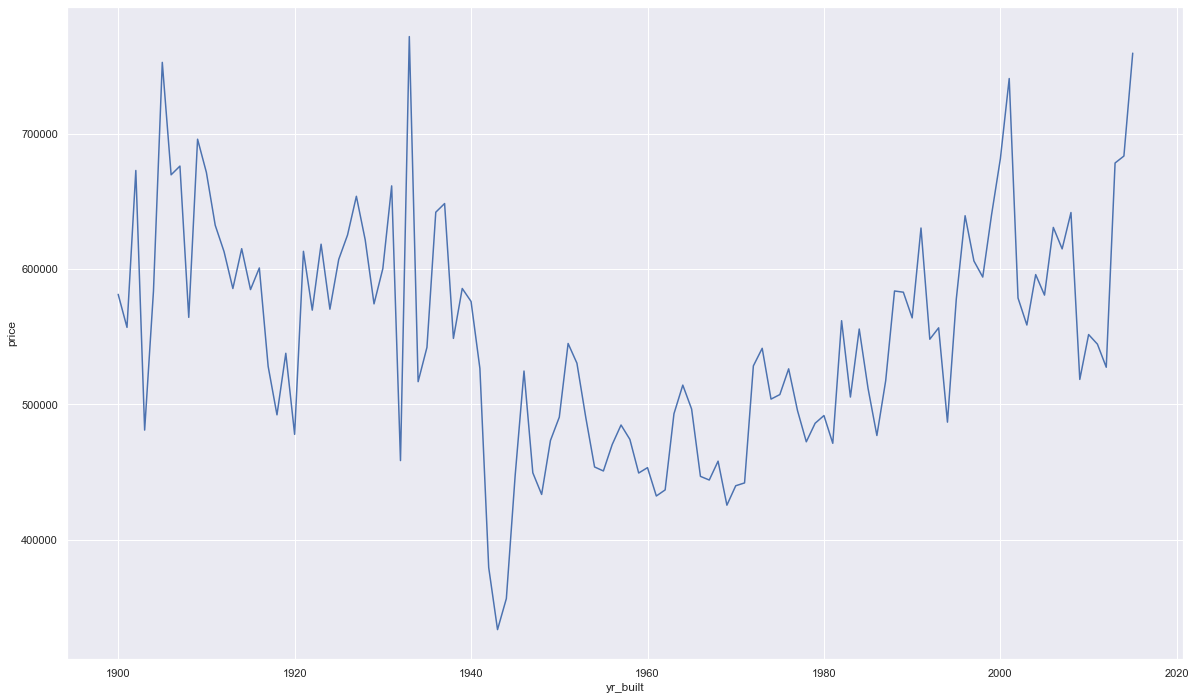

In [61]:
aux1 = df1[['price', 'yr_built']].groupby('yr_built').mean().reset_index()

sns.lineplot( x = 'yr_built', y= 'price', data = aux1)

## 3. Gráfico que represente a média dos preços pelos tipos de dormitórios

<AxesSubplot:xlabel='dormitory_type', ylabel='price'>

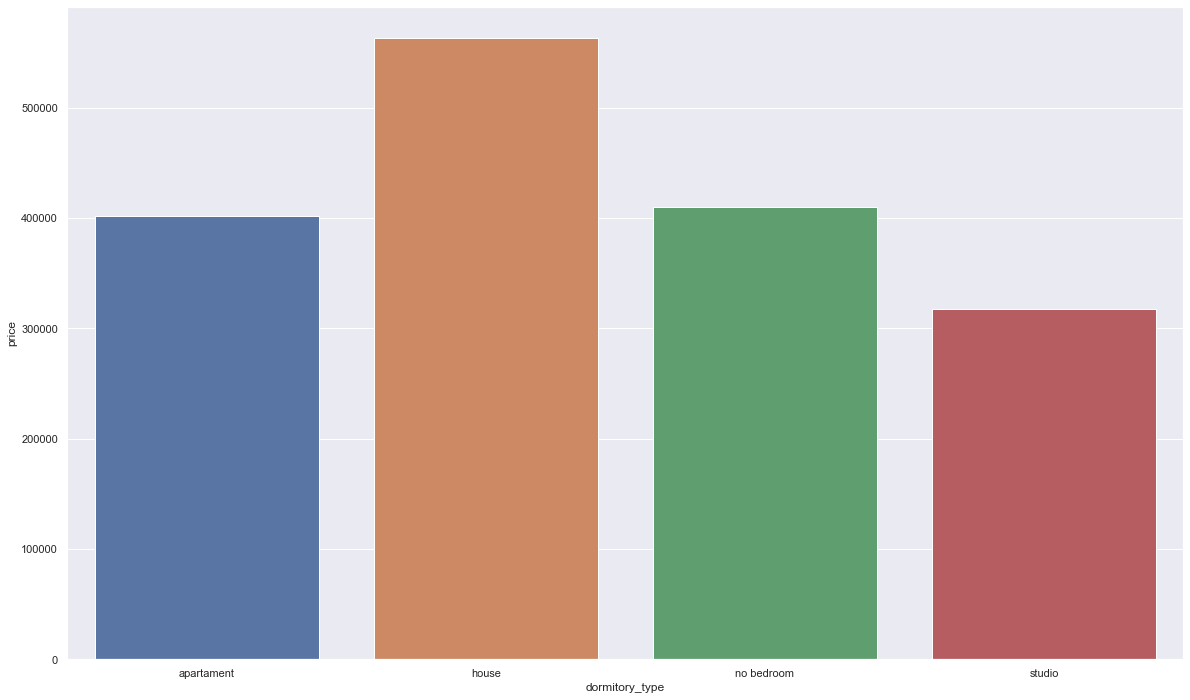

In [62]:
aux1 = df1[['price', 'dormitory_type']].groupby('dormitory_type').mean().reset_index()

sns.barplot( x = 'dormitory_type', y= 'price', data = aux1)

## 4. Gráfico que represente a evolução da média dos preços pelo ano da reforma dos imóveis a partir do ano de 1930.

<AxesSubplot:xlabel='yr_renovated', ylabel='price'>

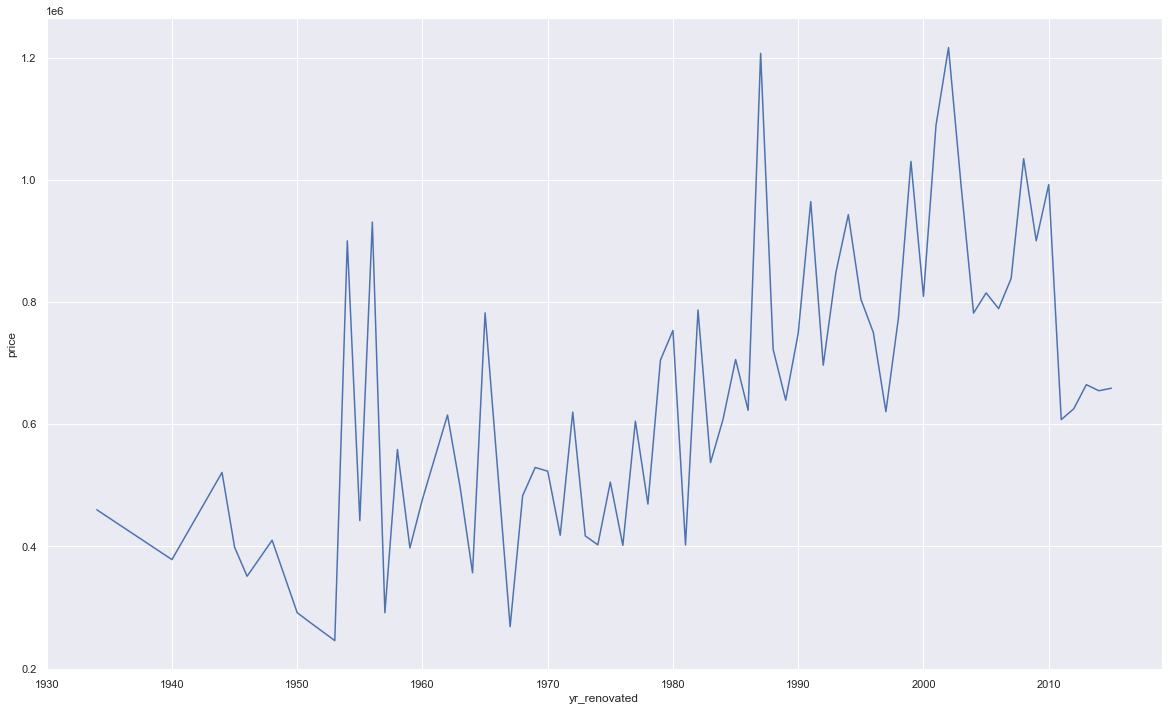

In [63]:
aux1 = df1.loc[df1['yr_renovated'] > pd.to_datetime ('1930'), ['price','yr_renovated']].groupby ('yr_renovated').mean().reset_index()
sns.lineplot( x = 'yr_renovated', y = 'price', data = aux1)

# <center> DASHBOARDS

Text(0, 0.5, '')

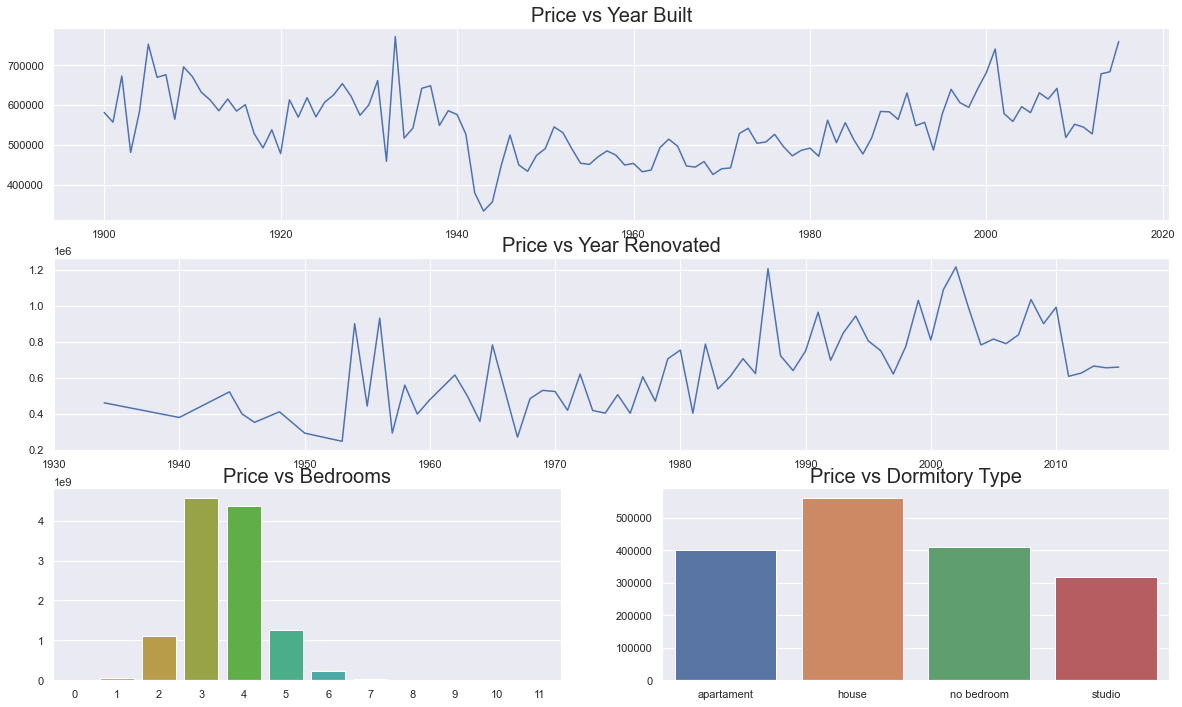

In [64]:
fig = plt.figure(figsize = (20,12))
specs = gridspec.GridSpec(ncols = 2, nrows = 3, figure=fig)

ax1 = fig.add_subplot(specs[0,:])
ax2 = fig.add_subplot(specs[1,:])
ax3 = fig.add_subplot(specs[2,0])
ax4 = fig.add_subplot(specs[2,1])

# 1
df = df1[['price', 'yr_built']].groupby('yr_built').mean().reset_index()
sns.lineplot( x = 'yr_built', y = 'price', data = df, ax = ax1);
ax1.set_title( "Price vs Year Built" , size = 20 )
ax1.set_xlabel("")
ax1.set_ylabel("")

# 2
df = df1.loc[df1['yr_renovated'] > pd.to_datetime ('1930'), ['price','yr_renovated']].groupby ('yr_renovated').mean().reset_index()
sns.lineplot( x = 'yr_renovated', y = 'price', data = df, ax = ax2);
ax2.set_title( "Price vs Year Renovated" , size = 20 ) 
ax2.set_xlabel("")
ax2.set_ylabel("")

# 3            
df = df1[['price', 'bedrooms']].groupby('bedrooms').sum().reset_index()
sns.barplot( x = 'bedrooms', y = 'price', data = df, ax = ax3);
ax3.set_title( "Price vs Bedrooms" , size = 20 )
ax3.set_xlabel("")
ax3.set_ylabel("")

# 4
df = df1[['price', 'dormitory_type']].groupby('dormitory_type').mean().reset_index()
sns.barplot(x = 'dormitory_type', y = 'price', data =df, ax= ax4);
ax4.set_title( "Price vs Dormitory Type" , size = 20 )
ax4.set_xlabel("")
ax4.set_ylabel("")

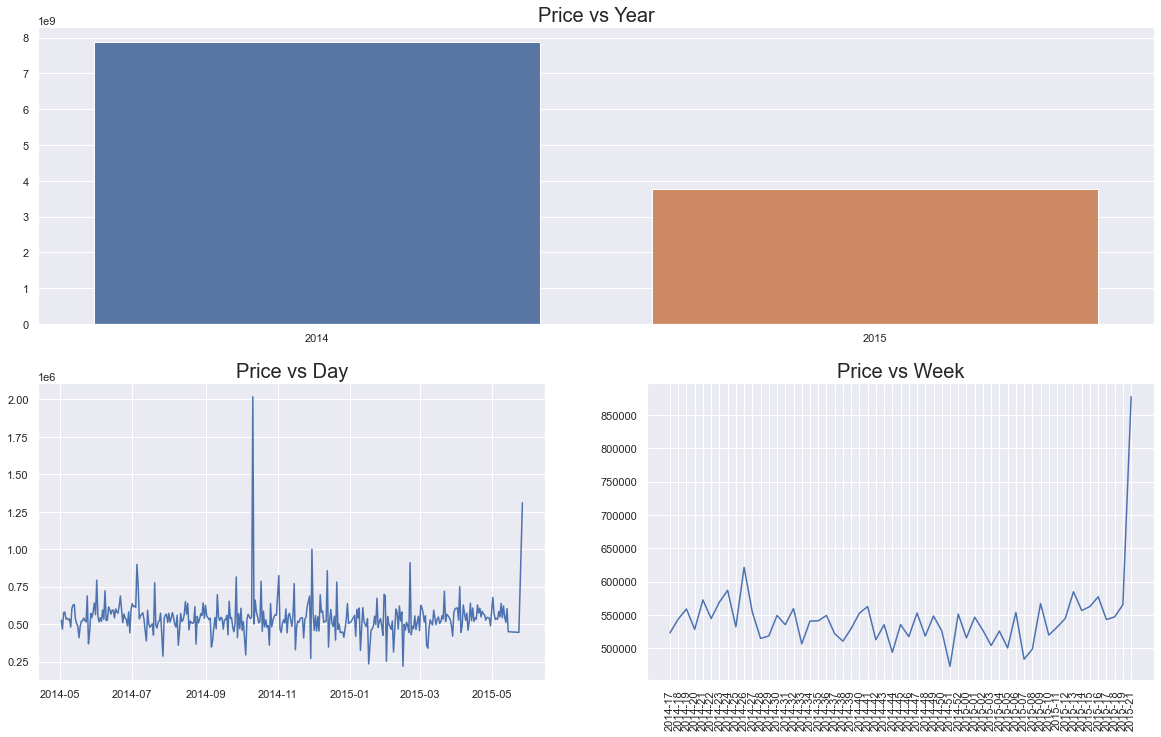

In [65]:
fig = plt.figure(figsize = (20,12))
specs = gridspec.GridSpec(ncols = 2, nrows = 2, figure=fig)

ax1 = fig.add_subplot(specs[0,:])
ax2 = fig.add_subplot(specs[1,0])
ax3 = fig.add_subplot(specs[1,1])

# Gráfico 1:
df1['year'] = pd.to_datetime (df1['date']).dt.year
by_year = df1[['price', 'year']].groupby('year').sum().reset_index()

sns.barplot(x = 'year',y = 'price', data = by_year, ax = ax1)
ax1.set_title( "Price vs Year" , size = 20 )
ax1.set_xlabel("")
ax1.set_ylabel("")

# Gráfico 2:
df1['day'] = pd.to_datetime (df1['date'])
by_day = df1[['price', 'day']].groupby('day').mean().reset_index()

sns.lineplot(x = 'day', y = 'price', data = by_day, ax = ax2)
ax2.set_title( "Price vs Day" , size = 20 ) 
ax2.set_xlabel("")
ax2.set_ylabel("")


# Gráfico 3:
df1['week'] = pd.to_datetime (df1['date']).dt.strftime('%Y-%U')
by_week = df1[['price', 'week']].groupby('week').mean().reset_index()

sns.lineplot(x = 'week', y = 'price', data = by_week, ax = ax3)
ax3.set_title( "Price vs Week" , size = 20 ) 
ax3.set_xlabel("")
ax3.set_ylabel("")
plt.xticks (rotation = 90 );

# <center> FILTROS ITERATIVOS

In [66]:
df2 =  df1.copy()

In [67]:
style = {'description_width' : 'initial'}

In [68]:
#Iterative Buttons - Price

price_limit = widgets.IntSlider(
    value = int(df2['price'].mean() ),
    min = df2['price'].min(),
    max = df2['price'].max(),
    step = 1,
    description = 'Maximum Price',
    disable = False,
    style = style
)

In [69]:
#Iterative Buttons - WaterFront

waterfront_bar = widgets.Dropdown(
    options = df2['is_waterfront'].unique().tolist(),
    value  = 'Yes',
    description = 'Water View',
    disable = False
)

In [70]:
#Iterative Buttons - LivingRoom

livingroom_limit = widgets.IntSlider(
    value = int(df2['sqft_living'].mean() ),
    min = df2['sqft_living'].min(),
    max = df2['sqft_living'].max(),
   step = 1,
    description = 'Minimum Living Room Size',
    disable = False,
    style = style
)

In [71]:
#Iterative Buttons - Bathrooms

bathrooms_limit = widgets.IntSlider(
    value = df2['bathrooms'].mean(),
    min = df2['bathrooms'].min(),
    max = df2['bathrooms'].max(),
    step = 1,
    description = 'Minimum Bathrooms',
    disable = False,
    style = style
)

In [72]:
#Iterative Buttons - Year Built

yr_built_limit = widgets.IntSlider(
    value = df2['yr_built'].mean(),
    min = df2['yr_built'].min(),
    max = df2['yr_built'].max(),
   step = 1,
   description = 'Year Built',
    disable = False,
    style = style
)

## <center> MAPA INTERATIVO

In [73]:
def update_map(df2, price_limit, livingroom_limit, bathrooms_limit, yr_built_limit, waterfront_bar ): 

    filters = df2[(df2['price'] < price_limit)&
                  (df2['sqft_living'] > livingroom_limit)&
                  (df2['bathrooms'] > bathrooms_limit) &
                  (df2['yr_built'] > yr_built_limit)&
                  (df2['is_waterfront'])][['id', 'lat', 'long', 'price', 'level']].copy()

    mapa = px.scatter_mapbox ( filters,
                               lat='lat',
                               lon='long',
                               size = 'price',
                               color = 'level',
                               hover_name='id',
                               color_continuous_scale = px.colors.cyclical.IceFire,
                               size_max = 15,
                               zoom = 10 )
    mapa.update_layout (mapbox_style = 'open-street-map', height = 600, margin = {'r':0, 't':0, 'l':0, 'b':0})
    mapa.show()

In [74]:
widgets.interactive (update_map, df2 =  fixed (df2), price_limit = price_limit,
                                                     livingroom_limit = livingroom_limit,
                                                     bathrooms_limit = bathrooms_limit,
                                                     yr_built_limit = yr_built_limit,
                                                     waterfront_bar = waterfront_bar)

interactive(children=(IntSlider(value=540083, description='Maximum Price', max=7700000, min=75000, style=Slide…

# <center> ITERATIVIDADE COM O DASHBOARD

In [75]:
df3 = df2.copy()

In [76]:
#Change Date Format

df3['year'] = pd.to_datetime (df3['date']).dt.strftime( '%Y' )
df3['date'] = pd.to_datetime (df3['date']).dt.strftime( '%Y-%m-%d')
df3['year_week'] = pd.to_datetime (df3['date']).dt.strftime( 'Y%-%U')

#Widget to Control Data

price_limit = widgets.IntSlider(
    value = int(df2['price'].mean() ),
    min = df2['price'].min(),
    max = df2['price'].max(),
    step = 1,
    description = 'Maximum Price',
    disable = False,
    style = style
)

waterfront_limit = widgets.Checkbox(
    value = False,
    description = 'Is Waterfront?',
    disable = False,
    indent = False)

In [77]:
def update_dash (df3, price_limit, waterfront_limit ):
    
    filters_2 = df3[(df3['price'] < price_limit)&
                    (df3['waterfront'] == waterfront_limit)].copy()

    
    fig = plt.figure (figsize = (21,12))
    specs = gridspec.GridSpec ( ncols =  2, nrows = 2, figure = fig )
    
    ax1 = fig.add_subplot (specs[0,:])
    ax2 = fig.add_subplot (specs[1,:])
    
    by_year = filters_2[['price','year']].groupby ('year').count().reset_index()
    sns.barplot (x = 'year', y = 'price', data = by_year, ax = ax1)
    plt.xticks (rotation = 90 );
    
    by_day = filters_2[['price','date']].groupby ('date').mean().reset_index()
    sns.lineplot (x = 'date', y = 'price', data = by_day, ax = ax2)
    plt.xticks (rotation = 90 );

In [78]:
widgets.interactive ( update_dash, 
                     df3 = fixed (df3),
                     price_limit = price_limit,
                     waterfront_limit = waterfront_limit )

interactive(children=(IntSlider(value=540083, description='Maximum Price', max=7700000, min=75000, style=Slide…